# Titanic: Machine Learning from Disaster


# Table of contents

1. Summary
2. About the problem
3. Data introduction and environment settings
    * 3.1. Importing libraries
    * 3.2. Importing data sets and first glance into data
    * 3.3. Missing values
4. Visual analysis
5. Data Preprocessing
    * 5.1. New variables' creation
        * 5.1.1. Variable - title
        * 5.1.2. Variable - ship_part
        * 5.1.3. Variable - family_members
        * 5.1.4. Variable - len_Name
    * 5.2. Data imputation    
    * 5.3. Label encoder    
    * 5.4. Categorical data - dummy variables
    * 5.5. Feature Scaling    
    * 5.6. Final input for the modelling chapter
6. Modelling
    * 6.1. Fitting training data into a set of classifiers    
    * 6.2. Model performance evaluation using k-fold cross validation    
    * 6.3. Grid search - tuning hyperparameters

# 1. Summary

This notebook tackles the problem of the Titanic's disaster. In the first chapter you can find the link to the detailed description of the problem. In the next two chapters you can see exactly how our variables are constructed, what informations do they have and what passengers' profiles do we encounter. Nextly, I introduced new variables that could be created, imputed columns containing missing values(using exploratory approach and mean approach), encoded categorical variables and created dummy variables. That prepared dataset I used to train a set of classifiers, measured the performance of the models using k-fold cross validation and chose the most promising classifier. In the last section, I challenged the most promising classifier and prooved that thanks to hyperparameter tunning better accuracy can be obtained.

# 2. About the problem

https://www.kaggle.com/c/titanic/data

# 3. Data introduction and environment settings

In this chapter, we will focus on preparing environment for our analysis.

## 3.1. Importing libraries 

In [2]:
#dealing with data
import pandas as pd
import numpy as np

#plotting 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

#preprocessing, modelling and evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

## 3.2. Importing data sets and first glance into data

In [3]:
#importing dataset from csv file delimited by ','
df_train = pd.read_csv(r'D:\SGH magisterskie\github\titanic\train.csv', delimiter=',')
df_test = pd.read_csv(r'D:\SGH magisterskie\github\titanic\test.csv', delimiter=',')

In [4]:
#df train headers
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#df test headers
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Raw datasets are ready for preprocessing part.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train['Survived'].unique()

array([0, 1], dtype=int64)

Thanks to the commands above, we can see the data types of the columns, total number of columns per data set information about missing values. Training dataset consists of one more column than test dataset. This column is our **independent variable - Survived** that informs us about the passengers' survival. Its column's type is already an int64 with only **2 levels** ( **1** - Survived, **0** - Not Survived ) and as a result this column will stay untouched till the end of the analysis.

## 3.3. Missing values

In [9]:
#missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As we figured it out earlier we encounter **missing values** in variables *Age*, *Cabin*, *Embarked* in the training dataset and *Age*, *Cabin*, *Fare* in the test dataset. Missing values can cause some serious problems for classification algorithm resulting with worse performance of the models. In the future chapter we will cope with that thanks to **data imputation strategies**.

The visual representation of the columns containing missing data:

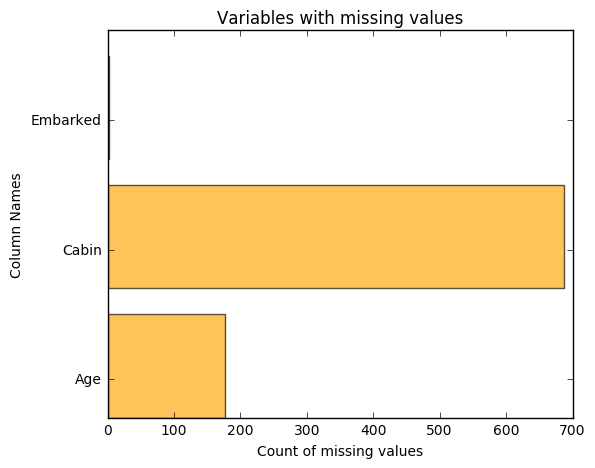

In [11]:
#plotting columns containing missing data   
def plt_missing_val_per_col(df):
    #making sure that all libraries are imported
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    #plot construction
    null_columns=df.columns[df.isnull().any()]
    labels = []
    values = []
    for col in null_columns:
        labels.append(col)
        values.append(df[col].isnull().sum())
    ind = np.arange(len(labels))
    width=0.6
    fig, ax = plt.subplots(figsize=(6,5))
    ax.barh(ind, np.array(values), color='orange', alpha = 0.65)
    ax.set_yticks(ind+((width)/2.))
    ax.set_yticklabels(labels, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_ylabel("Column Names")
    ax.set_title("Variables with missing values");

plt_missing_val_per_col(df_train)

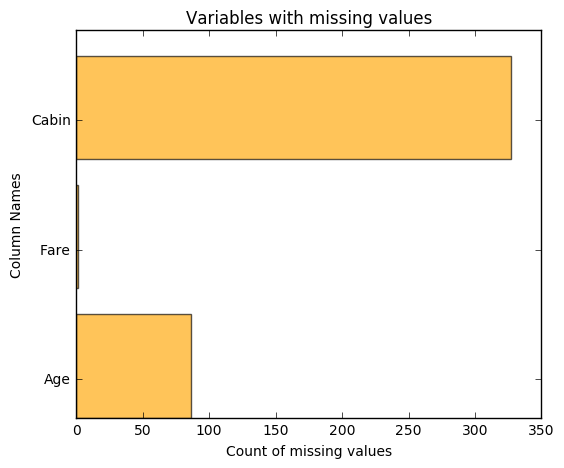

In [12]:
plt_missing_val_per_col(df_test)

# 4. Visual analysis

Visual analysis is an essential part that helps understanding the data and visualize them in a pleasing to the eye way. In this chapter we will play around with **seaborn** and **matplotlib** packages.


df_train:


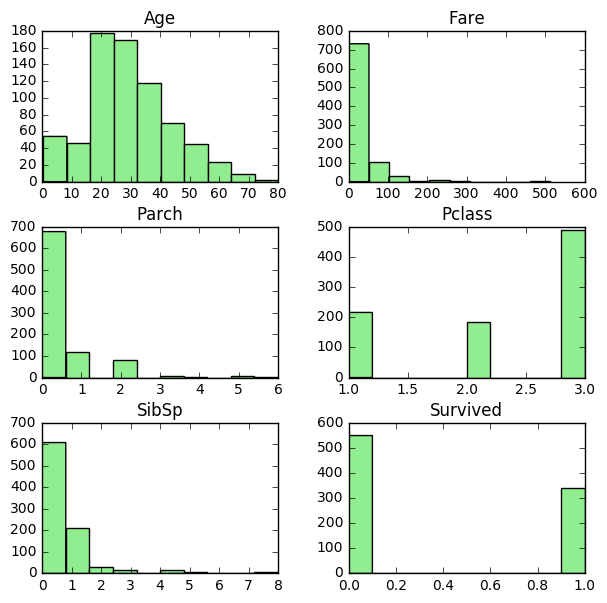

In [13]:
#plotting variable histograms
print ("\ndf_train:")
df_train.drop(["PassengerId"], axis=1).hist(bins=10, figsize=(7,7), grid=False, color="lightgreen");


df_test:


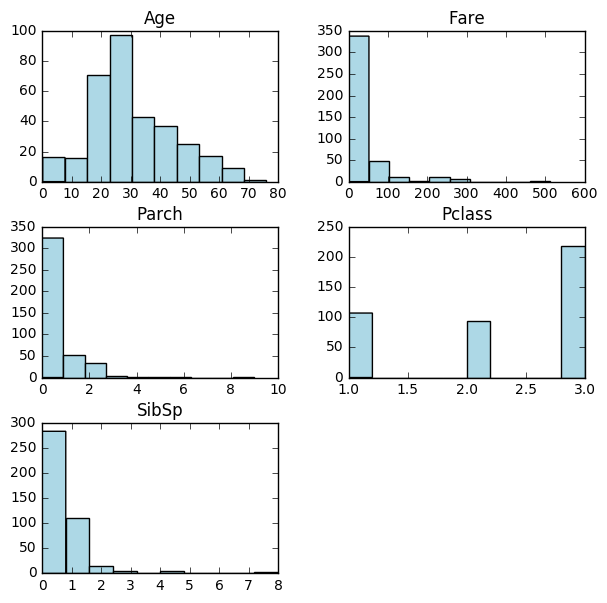

In [14]:
print ("\ndf_test:")
df_test.drop(["PassengerId"], axis=1).hist(bins=10, figsize=(7,7), grid=False, color="lightblue");

A **histogram** is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. To construct a histogram we need to specify *bins* paramater that will divide the entire range of values into a series of intervals and then count how many values fall into each interval. If *bins* paramater is not specified Python will use the default settings.

**Age**: Both training and test datasets have similar distributions. We can see that the significant number of passengers are somewhere between 15 and 30 years old.

**Fare**: Both training and test datasets have similar distributions. Fares below about 50 are the most common in the datasets.

**Parch, Pclass and SibSp** have similar distributions on training and test dataset as well. 

Histogram for **Survived** variable shows us that about 350 people survived in the training dataset. 

In [15]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

To be more specific: **342 passengers survived**.

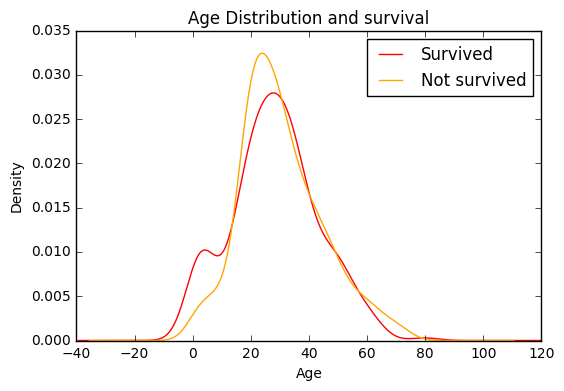

In [16]:
df_train[df_train.Survived==1].Age.plot(kind='kde', color = 'red')    
df_train[df_train.Survived==0].Age.plot(kind='kde', color = 'orange')    
plt.xlabel("Age")    
plt.title("Age Distribution and survival")
plt.legend(('Survived', 'Not survived'), loc='best') ;

Thanks to the plot above we can assume that the youngest passengers where in the first line to the lifeboats.

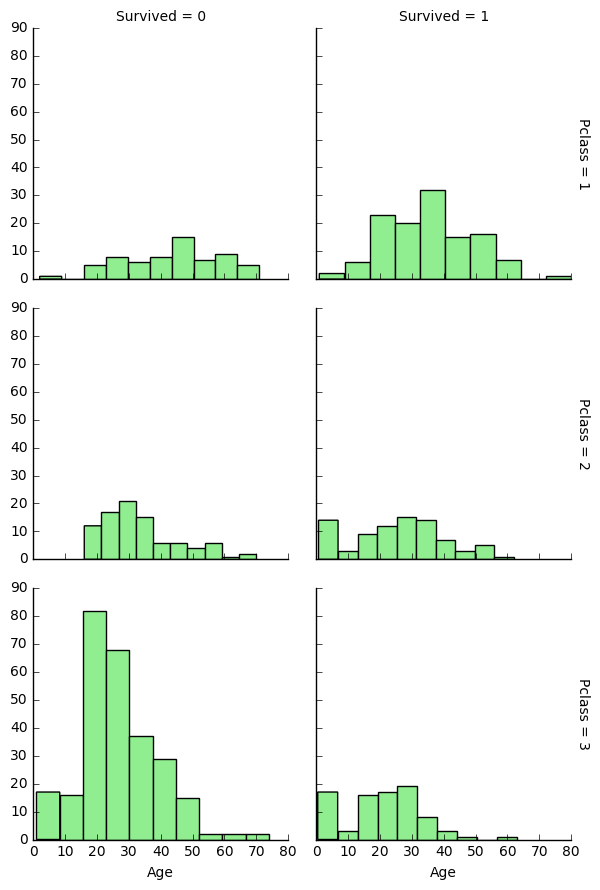

In [17]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', margin_titles=True)
grid.map(plt.hist, 'Age', color="lightgreen")

Thanks to the addition of the next dimension - Pclass, we can see that the reachest passengers have the higher chance of survival in almost every Age interval's category.

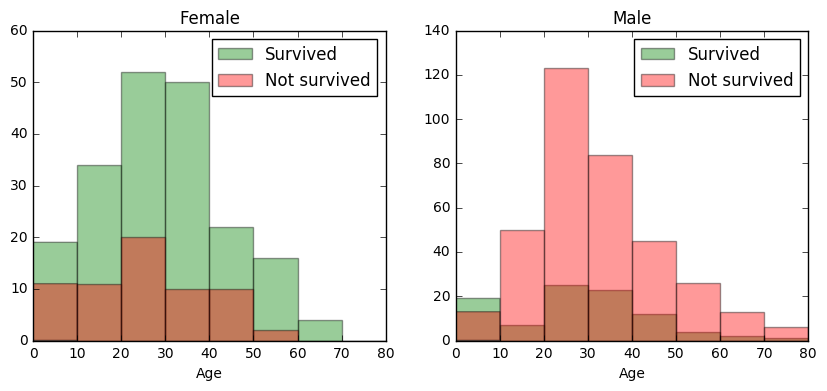

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
bins_rng = range(0,85,10)
survived = df_train[df_train.Survived==1]
notsurvived = df_train[df_train.Survived==0]

ax = sns.distplot(survived[survived.Sex=='female'].Age.dropna(), 
                  bins=bins_rng, label = 'Survived', ax = axes[0], kde =False, color='green')
ax = sns.distplot(notsurvived[notsurvived.Sex=='female'].Age.dropna(), 
                  bins=bins_rng, label = 'Not survived', ax = axes[0], kde =False, color='red')
ax.legend()
ax.set_title('Female')
ax = sns.distplot(survived[survived.Sex=='male'].Age.dropna(), 
                  bins=bins_rng, label = 'Survived', ax = axes[1], kde = False, color='green')
ax = sns.distplot(notsurvived[notsurvived.Sex=='male'].Age.dropna(), 
                  bins=bins_rng, label = 'Not survived', ax = axes[1], kde = False, color='red')
ax.legend()
_ = ax.set_title('Male')

What is more, women were more likely to survive in each Age group than men. The survival rate for men is the highest for the youngest.

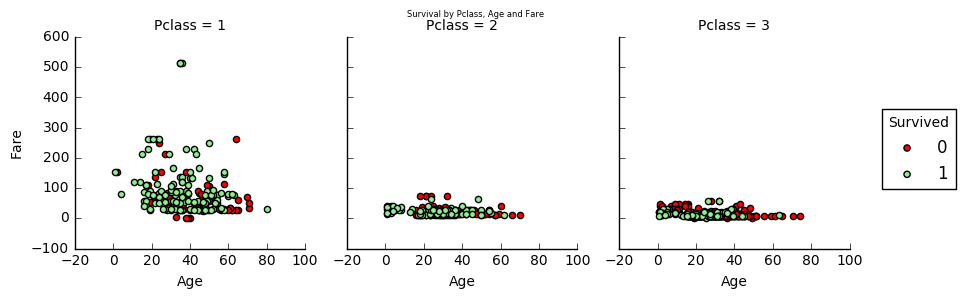

In [19]:
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"lightgreen", 0:"red"})
g=g.map(plt.scatter, "Age", "Fare", edgecolor="black").add_legend();
g.fig.suptitle('Survival by Pclass, Age and Fare', fontsize=6);

The passengers from the 1st class have the highest rate of survival. The 1st class passengers paid higher Fare.

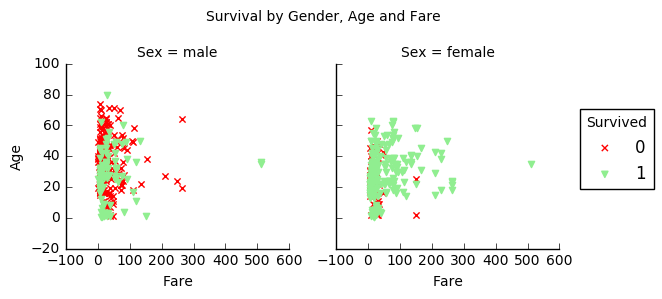

In [20]:
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                palette={1:"lightgreen", 0:"red"}, hue_kws=dict(marker=["x", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="lightgreen").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age and Fare');

Once again... It was better to be a female on Titanic. What is intresting the passengers that paid Fare between 200 and 300 in case of women all survived but in case of men all of them died regardless the Age category.

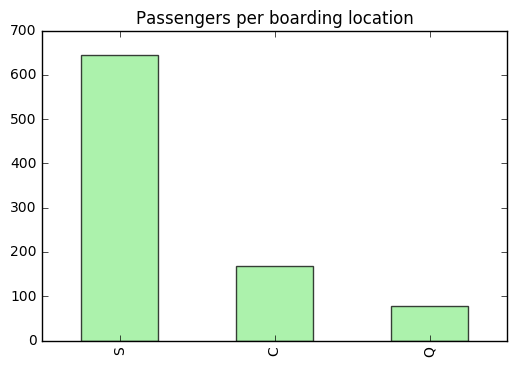

In [23]:
df_train.Embarked.value_counts().plot(kind='bar', alpha=0.75, color="lightgreen")
plt.title("Passengers per boarding location");

This plot shows how manyand where passengers started their travel.

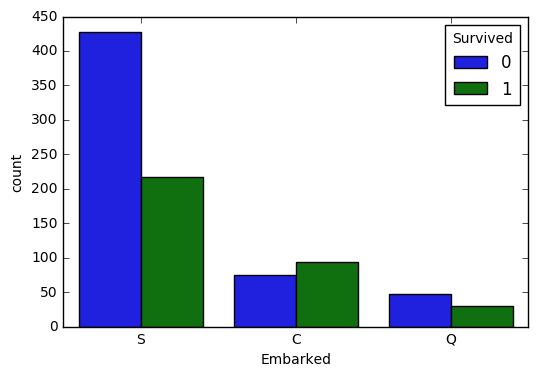

In [24]:
sns.countplot(x="Embarked", hue="Survived", data=df_train)

Survival considering passenger's starting location shows us that the highest rate of survival was for the location C.

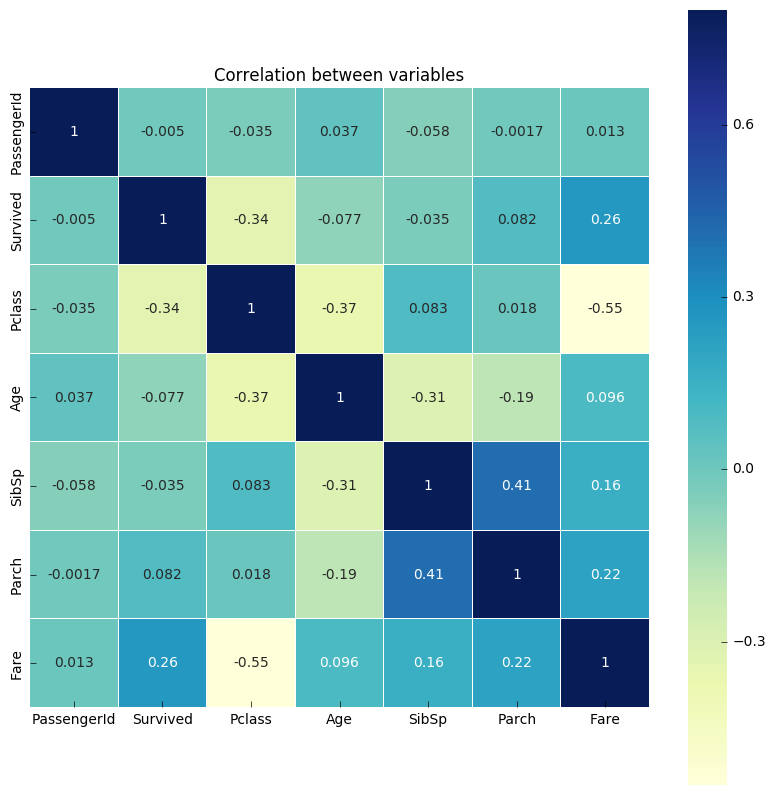

In [26]:
corr=df_train.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between variables');

A heatmap shows how variables correlate with each other. It can give us an idea which features could be the most important for the problem.

And with this last plot we will end our visual analysis. 

# 5. Data Preprocessing

In this chapter we will focus on preprocessing data, extracting information from variables, creating new variables, imputing missing data and creating dummy variables. The result of the mentioned actions will be used as an input to classifiers.

## 5.1. New variables' creation

Thanks to the previous chapters we know our variables and how they behave in our dataset. But there are still informations in our datasets that are hidden. To achieve better performance of our models we would like to extract as much of them as possible. So, let's make them visible.  

**New variables** that could give an additional value to our future model:

**title** - based on column **Name** (extracting title), 

**ship_part** - based on column **Cabin** (extracting Cabin location),

**family_members** - based on columns **SibSp** and **Parch** (sum of these 2 columns will return the value of the family members aboard).

**len_Name** - based on columns **Name** (extracting length of the Name) - 

***5.1.1. Variable - title***

How to extract title?

In [27]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


As we can see, inside column *'Name'* there is always a title starting with **','** and **'.'** in the end. We need to **create a function** and than **apply** it on column *'Name'* in our data frames in order to extract title.

In [28]:
#function that extracts title
def title(passenger):
    name = passenger['Name']
    start = name.find(',') + 1
    end = name.find('.')
    
    return name[start:end].strip()

#extracting title
df_train['title'] = df_train.apply(title, axis=1)
df_test['title'] = df_test.apply(title, axis=1)

#showing unique values and count
print(df_train.groupby('title').size(), '\n\n',
      df_test.groupby('title').size())

title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64 

 title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64


Both training and test datasets show that variable's levels: **'Master', 'Miss', 'Mr', 'Mrs'** are the most frequent in our dataset while other titles are rather rare. With that incentive, we will **aggregate** them and create new variable's level **'Other'**.

In [29]:
df_train['title'] = df_train.apply(lambda passenger: passenger['title'] if passenger['title'] in ["Master","Miss","Mr","Mrs"] else "Other" , axis=1)
df_test['title'] = df_test.apply(lambda passenger: passenger['title'] if passenger['title'] in ["Master","Miss","Mr","Mrs"] else "Other" , axis=1)

#showing unique values and count
print(df_train.groupby('title').size(), '\n\n',
      df_test.groupby('title').size())

title
Master     40
Miss      182
Mr        517
Mrs       125
Other      27
dtype: int64 

 title
Master     21
Miss       78
Mr        240
Mrs        72
Other       7
dtype: int64


***5.1.2. Variable - ship_part***

Before each value of a **'Cabin'** column we encounter alphabetical character. It could give an information where the passenger's cabin is located. Let's extract this.

In [31]:
#extracting ship_part
df_train['ship_part'] = df_train['Cabin'].fillna('Unknown').str[0]
df_test['ship_part'] = df_test['Cabin'].fillna('Unknown').str[0]

***5.1.3. Variable - family_members***

Columns **SibSp** and **Parch** combined results with a variable containing information about the amount of family members aboard.

In [32]:
#extracting an amount of the family members aboard
df_train['family_members'] = df_train['Parch'] + df_train['SibSp']
df_test['family_members'] = df_test['Parch'] + df_test['SibSp']

***5.1.4. Variable - len_Name***

Sometimes even variables that do not have any business interpretation can result with and additional information that will result with the better performance of the model. Corelating survival with name length is a tough puzzle for a human but we could try to make assumptions that with longer name goes the fact that the passenger has two surnames and that points at the fact that the passenger is either married woman or widow. Other explanation could be that the passeneger has some kind of fency title and a longer name that is a prestigious and a visible way for the noble families to stand out from the crowd. As we have the access to the whole dataset we could come to such conclusions but we never know what a classifier will figure out base on such constracted column. 
Let's prepare this variable.

In [34]:
#extracting the length of the name
df_train['len_Name'] = df_train.apply(lambda passenger: len(passenger['Name']) , axis=1)
df_test['len_Name'] =  df_train.apply(lambda passenger: len(passenger['Name']) , axis=1)

At this point, our data frame is described by following set of variables (considered by future models):

a) **numerical**: (**continous**: Age, Fare; **discrete**: SibSp, Parch, family_members, len_Name)

b) **categorical**: ( Embarked, title, ship_part ; **dichotomic**: Survived, Sex ; **ordinal**: Pclass)

c) variables not mentioned here like PassengerID will be ignored in our models
        

## 5.2. Data imputation

As we've already mentioned in the 3. chapter there is a problem of missing values in our dataset. 

There are 2 missing values in Embarked column in training dataset and 1 missing value in Fare column in test dataset. We will try to impute these 3 values by exploring the characteristics of these observations.

Let's start with Embarked variable.


In [35]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,ship_part,family_members,len_Name
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,B,0,19
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,B,0,41


Both passengers are females and their Fare amounts to 80. Using these 2 characteristics we will try to choose the best imputation value for them.

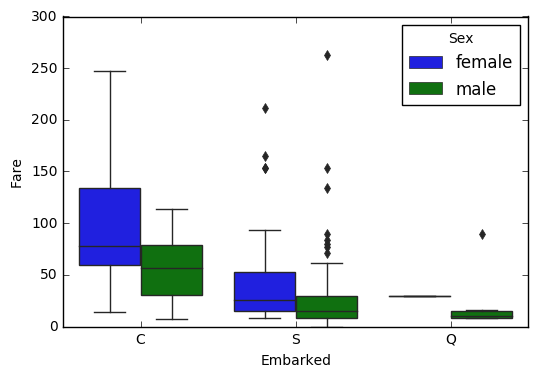

In [36]:
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=df_train[df_train.Age>=38 ])

It turns out that women (older than 38 years old) for whom median Fare equals to around 80, have Embarked value equal to "C". 

In [37]:
#filling missing values into specific rows
df_train.loc[df_train['PassengerId'] == 62, "Embarked"] = "C"
df_train.loc[df_train['PassengerId'] == 830, "Embarked"] = "C"

Secondly, we will try to impute the missing value for the passenger with id equal to 1044.

In [38]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,ship_part,family_members,len_Name
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,U,0,16


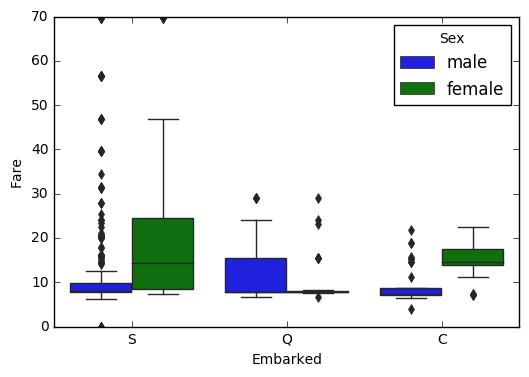

In [39]:
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=df_train[df_train.Pclass==3])

Considering the characteristics of the passenger and similar to him passengers (from the training data frame) we decide to fill the missing value with the rounded median Fare of the mentioned group of passengers.

In [40]:
#filling variable value for one specific row
df_test.loc[df_test['PassengerId'] == 1044, "Fare"] = 8

When it comes to Age, we will fill it with an avarage age value from the training data frame.

In [41]:
#Imputation
imput_col = 'Age'
df_train[imput_col] = df_train[imput_col].fillna(df_train[imput_col].mean())
df_test[imput_col] = df_train[imput_col].fillna(df_train[imput_col].mean())
print(df_train[imput_col].mean())

# imput_col = 'Fare'
# df_test[imput_col] = df_train[imput_col].fillna(df_train[imput_col].mean())

# imput_col = 'Embarked'
# df_train[imput_col] = df_train[imput_col].fillna(df_train[imput_col].mode()[0])

del imput_col

29.699117647058763


## 5.3. Label encoder

Encoding categorical - string data into numbers.

In [42]:
#Label encoder 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

categorical = ['Sex', 'Embarked', 'title']
for _col in categorical:
    df_train[_col] = labelencoder.fit_transform(df_train[_col])    
    df_test[_col] = labelencoder.transform(df_test[_col])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,ship_part,family_members,len_Name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,U,1,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,C,1,51
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,U,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,C,1,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,U,0,24


## 5.4. Categorical data - dummy variables

Encoding the categorical data into dummy variables. Thanks to *drop_first* command we can avoid the dummy variable' trap. 


In [43]:
#dummy variables
df_train = pd.concat([df_train,
                     pd.get_dummies(df_train.title, prefix='title', drop_first=True),
                     #pd.get_dummies(df_train.ship_part, prefix='ship_part', drop_first=True),
                     pd.get_dummies(df_train.Embarked, prefix='Embarked', drop_first=True)] 
                     , axis = 1 )

df_test = pd.concat([df_test,
                     pd.get_dummies(df_test.title, prefix='title', drop_first=True),
                     #pd.get_dummies(df_test.ship_part, prefix='ship_part', drop_first=True),
                     pd.get_dummies(df_test.Embarked, prefix='Embarked', drop_first=True)] 
                     , axis = 1 )

**If we want to consider the ship_part variable in our models we have to uncomment 2 commented lines above and 1 commented line below.**

In [45]:
#train and test datasets have to have the same column set
df_train.shape[1] - 1 == df_test.shape[1]

#making sure that all columns in the training dataset have its equivalent in the test set
#columns that are in train but not in test
print('Train vs test', np.setdiff1d(list(df_train), list(df_test)))
#columns that are in test but not in train
print('Test vs train', np.setdiff1d(list(df_test), list(df_train)))

#adding missing column to the test set
#df_test['ship_part_T'] = 0 

Train vs test ['Survived']
Test vs train []


## 5.5. Feature Scaling 

Feature scaling ensures that just because some features have high values it won't lead to using them as a main predictor. What is more, it gives compilation' advantage to the algorithms such as gradient descent in reaching the optimum.

In [46]:
#feature scaling
from sklearn.preprocessing import StandardScaler

feature_scaling_col = ['Age', 'Fare', 'len_Name']
sc_X = StandardScaler().fit(df_train[feature_scaling_col])
df_train[feature_scaling_col] = sc_X.transform(df_train[feature_scaling_col])
df_test[feature_scaling_col] = sc_X.transform(df_test[feature_scaling_col])

## 5.6. Final input for the modelling chapter

In [47]:
#preparing training and test arrays for sklearn classification models
X_train = df_train.drop(["Survived", "PassengerId", "Name", "Ticket", 
                         "Cabin", "Embarked", "title", "ship_part"], axis=1)\
            .values
X_test = df_test.drop(["PassengerId", "Name", "Ticket", 
                       "Cabin", "Embarked", "title", "ship_part"], axis=1)\
            .values
y_train = df_train['Survived'].values

# 6. Modelling

Finally, we reached the best part of analysis - modelling. We will train models base on the training dataset, evaluate their performance using k-fold cross validation and in the end we will try to tune hyperparameters of the chosen model to achieve even better performance.  

## 6.1. Fitting training data into a set of classifiers

There are a lot possible models that we can use in classification problems. In order to choose the best classifier for the problem it is good to think if our problem is linear or non-linear. As it is not so obvious while having this many dimension as in this case, we can try both types of classifiers. The amount of training data that we have is really low and as a result we do not have to worry about the compilation time of the training stage.


**Chosen classifiers:**
* Decision Tree
* Random Forest
* Naive Bayes
* Kernel SVM - gaussian
* Kernel SVM - linear
* Kernel SVM - linear
* K-NN
* Logistic Regression
* AdaBoost
* Perceptron
* Stochastic Gradient Descent

In [48]:
#model classification 

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifierTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierTree.fit(X_train, y_train)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifierForest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifierForest.fit(X_train, y_train)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifierNaive = GaussianNB()
classifierNaive.fit(X_train, y_train)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifierSV_RBF = SVC(kernel = 'rbf', random_state = 0)
classifierSV_RBF.fit(X_train, y_train)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifierSV_LIN = SVC(kernel = 'linear' ,random_state = 0)
classifierSV_LIN.fit(X_train, y_train)

# Linear SVC - different default values than the previous one
from sklearn.svm import LinearSVC
classifierSVLIN = LinearSVC(random_state=0)
classifierSVLIN.fit(X_train, y_train)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifierNEIGH =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierNEIGH.fit(X_train, y_train)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifierLOG = LogisticRegression(random_state = 0)
classifierLOG.fit(X_train, y_train)

# Fitting AdaBoost to the Training set
from sklearn.ensemble import AdaBoostClassifier
classifierADA = AdaBoostClassifier()
classifierADA.fit(X_train, y_train)

# Perceptron
from sklearn.linear_model import Perceptron
classifierPERC = Perceptron()
classifierPERC.fit(X_train, y_train)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
classifierSGRAD = SGDClassifier()
classifierSGRAD.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

Models initialized.

## 6.2. Model performance evaluation using k-fold cross validation

K-Fold cross validation is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. It reduces the risk of overfitting.

In our case we will use 8 folds and focuse on the accuracies of the models.


In [49]:
#evaluating
#list of classifiers
classifiers = [classifierTree, classifierForest, classifierNaive, 
               classifierSV_RBF, classifierSV_LIN, classifierSVLIN,
               classifierNEIGH, classifierLOG, classifierADA,
               classifierPERC, classifierSGRAD]
               
#list of classifiers' names
classifier_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 
               'Support Vector Rbf', 'Support Vector Linear_1', 'Support Vector Linear_2',
               'K-Nearest Neighbours', 'Logistic Regression', 'ADA Boost',
               'Perceptron', 'Stochastic Gradient Descent']

#output lists (mean accuracy, standard deviation and predicted values for the test data set)
mean_acc = []
std_acc = []
y_preds = []
for classifier in classifiers:
    y_preds.append(classifier.predict(X_test))
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 8)
    mean_acc.append(round(accuracies.mean()*100,2)) #mean accuracy
    std_acc.append(round(accuracies.std()*100,2))  #std accuracy

#showing results
for i in range(0,len(classifiers)):
    print(classifier_names[i], ' '*(30 - len(classifier_names[i])) , mean_acc[i],
          ' '*(10 - len(str(mean_acc[i]))) , std_acc[i])   

Decision Tree                   76.66       3.18
Random Forest                   82.49       1.9
Naive Bayes                     78.34       1.45
Support Vector Rbf              83.17       2.06
Support Vector Linear_1         82.72       2.56
Support Vector Linear_2         82.61       2.37
K-Nearest Neighbours            82.04       1.84
Logistic Regression             81.82       1.85
ADA Boost                       80.37       2.19
Perceptron                      74.07       7.51
Stochastic Gradient Descent     76.22       3.62


The list shows how our models performed. First column informs about the mean accuracy of the 8 different evaluations. The second column represents standard deviation of these results. As we can see, **Perceptron** classifier has the lowest value of the accuracy score and the highest standard deviation, it is definitely the worst approach that we can persue classifing survival classes to the new observations. **The Gaussian Support Vector Machine (Rbf)** classifier scored **the highest accuracy (83.17%)** while having **quite low standard deviation (2.06%)**. Bravo! It looks like we have a winner. 

## 6.3. Grid search - tuning hyperparameters

The last part of this notebook will be about hyperparameters' tuning. 

Let's make it fun and try to use the classifier that looks also quite promising as **Gaussian SVM** and check if we can beat the score of our current winner. **Random Forest** classifier has very nice standard deviation (which shouldn't be a surprise base on the way how does the "democratic elections" conducted by decision trees work in the classifier' algoritm) and its accuracy is also quite good **82.26%**. 

*In the normal situation we would rather persue the strategy of tuning **the Gaussian Support Vector Machine (Rbf)** classifier. However, it is not true that other classifiers can't outperform our first choice. Using this example we will try to proove it. *

In [50]:
#grid search for the chosen model
from sklearn.grid_search import GridSearchCV
tuning_hyper_par = [{'criterion': ['gini', 'entropy'],  
                    'min_samples_split': [1, 2, 3, 4],
                    'min_samples_leaf': [1, 2, 3, 4],
                    'random_state' : [0],
                    'n_estimators': [100] }]
grid_search = GridSearchCV(estimator = classifierForest,
                           param_grid = tuning_hyper_par,
                           scoring = 'accuracy',
                           cv = 8,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train) 
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_ 
print(best_accuracy)
print(best_parameters)

#final prediction using best_parameters
y_pred_final = grid_search.predict(X_test)

0.83950617284
{'min_samples_leaf': 2, 'min_samples_split': 1, 'criterion': 'entropy', 'random_state': 0, 'n_estimators': 100}


Finally, our **best accuracy** is almost **84%** thanks to hyperparameter tuning. We not only **improved the accuracy** of the **Random Forest** classifier but also we **outperformed** all of the **other models** (including **Gaussian SVM**). Our **best hyperparameters** have been chosen and shown above. 